# Inferential statistics


$$Population --> Sampling --> Sample --> Inferential & descriptive statistics$$

The idea here is to estimate the parameters of a population using statistics obtained from a sample.

Inferential statistics **involves making inferences or predictions about a population based on a sample of data**. This is used because it is often not feasible or practical to study an entire population. Some key concepts in inferential statistics include:

- Hypothesis testing
- Confidence intervals
- Regression analysis

Using these concepts we can make educated guesses or predictions about a population parameter based on a sample of data.

## Sampling techniques
This refers to methods used to select a subset of items or individuals from a larger population for the purpose of making infereneces about the entire population. The choice of sampling technique is therefore dependent on:

- Research objectives
- Resources available
- Characteristics of the population being studied

Each technique has its strengths and limitations in terms of representativeness, precision and practicality.


`1. Convenience sampling`

Items are selected based on their availability and accessibility. This method is convenient but is not representative of the population and bias is easily introduced. Example: collecting data for opinions on a new product by conducting interviews with people in a shopping mall.

`2. Systematic sampling`

Here, items are selected at regular intervals from an ordered list. E.g., selecting every 6th item from a production line.

`3. Simple random sampling (SRS)`

Using the SRS method, every item in the population has an equal chance of being selected. This however, is done without replacement. For example, assign a unique number to each student in a school and then using a random number generator to select 50 students from the school.

`4. Stratified sampling`

Population is divided into distinct strata (subgroups) based on certain characteristics, then random sampling is performed/drawn from each stratum pproportionally. E.g., dividing a city's population into age groups and then randomly selecting a proportional number from each age group


`5. Cluster sampling`

The population is divided into clusters (segments), then random sampling is performed to obtain clusters for the sample. All individuals within the selected clusters are included in the sample. Example, dividing a Nigerian's population into regions, randomly selecting a few regions and then surveying all households within thse regions.


## Population parameter and sample statistics

**Population Parameter**

This is a numerical characteristic of an entire population. It describes some aspect of the population's distribution or behaviour. Examples include:

- Population mean
- Population std
- Population proportion, etc

For instance, if we're interested in the average height of all the male adults in a country, the **actual** average height of the **entire** population is the population parameter.


**Sample statistics**

These are numerical measures calculated from a sample (subset) of the population. These statistics are used to estimate or infer information about the corresponsing population parameter. Common sample statistics include sample mean, sample std, sample proportion, etc. Let's say we sample a group of 100 adult males from a country and calculate the average height. This calculated value is the sample satistic which can be used to estimate the population parameter (average height of all adult males in the country)

**Comparing the formulas for population parameters and sample statistics**

`1. Mean/average `

- Population mean (μ):  

$$\mu = \frac{\sum x}{N}$$

Where N = total number of items in the entire population

- Sample mean (x̄): 

$$x̄ = \frac{\sum x}{n}$$

Where n = number of items in the sample


`2. Variance`

- Population variance (σ²):  

$$\sigma² = \frac{\sum (x - \mu)²}{N}$$

- Sample variance (s²):

$$s² = \frac{\sum (x - x̄)²}{n-1}$$

**P.S.: Bessel's correction (n-1) is applied for sample variance, why?**

It is a mathematical adjustment  made to sample statistics to provide unbiased estimates of population parameters. It is particularly important when calculating the sample variance and sample standard deviation.

**Without the bessel's correction, the sample variance underestimates the population variance.** The bessel's correction involves a minus of 1 from the number of items in the sample to serve as a compensation.

When we estimate the population mean with the sample mean, we lose one degree of freedom which is the reason behind why we extract one from the sample size

## How to perform estimations/approximations/inference

**Step 1: take a sample**

Uniformly at random, try to take a `large enough sample` from the population such that the sample is a correct representation of the entire population

**Step 2: calculate the sample statistics**

**Step 3: estimate the population parameter** using the sample statistics. Some of the ways to do this include using various estimation techniques like:

- Point estimate
- Confidence interval estimate
- Maximum Likelihood estimation
- Generalized Method of Moments,etc

### Types of bias (i.e errors)

1. Sampling bias: resolved by choosing a better sampling process
2. Outlier bias: resolves by taking a sufficiently large enough sample or using confidence interval estimate

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
pop_df = pd.read_csv('Data/adult.csv')
pop_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
pop_df.info(), pop_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(None, (48842, 15))

<AxesSubplot:xlabel='age', ylabel='Count'>

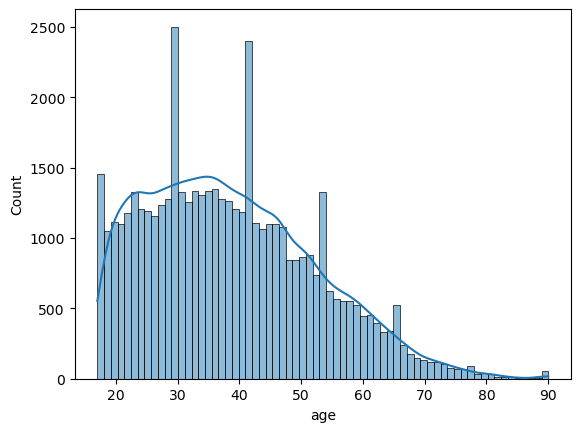

In [7]:
sns.histplot(data=pop_df, x='age', kde=True)

In [8]:
print('Num_of_items_in_population(N):', pop_df.shape[0])
print('Population mean(μ):', pop_df['age'].mean())

Num_of_items_in_population(N): 48842
Population mean(μ): 38.64358543876172


## Sampling in pandas dataframe

### Method 1: Using frac parameter

This selects the fraction of the data that you want to randomly sample

In [9]:
pop_df.sample(frac=0.1, random_state=42)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43114,62,Local-gov,208266,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
5042,45,Private,256866,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
7027,25,Local-gov,170070,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
36588,47,Self-emp-not-inc,26145,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K


### Method 2: using n parameter 

Using n to mention the number of data points that you want to randomly sample

In [10]:
pop_df.sample(n=100, random_state=42)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,30,Private,267281,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
32845,30,Private,272669,Some-college,10,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
36853,35,Private,202027,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,7298,0,35,United-States,>50K
28697,57,Private,279636,Assoc-voc,11,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,>50K


## Point estimate using one sample (one sample drawn from the population)

This involves using a single value or statistic computed from the sample to estimate the population parameter. E.g, using the sample mean to estimate the population mean. **This is based on only one sample drawn or taken from the population.**

In [11]:
#Step 1: uniformly at random take a large enough sample from population

sample_df = pop_df.sample(frac=0.2, random_state=42)
sample_df.shape

(9768, 15)

In [12]:
# Step 2: calculate sample statistics

sample_df['age'].mean()

38.7273751023751

In [13]:
# Step 3: estimating the population parameter using the sample statistics

print('Population mean(parameter):', pop_df['age'].mean())
print('Sample mean(statistics):', sample_df['age'].mean())

Population mean(parameter): 38.64358543876172
Sample mean(statistics): 38.7273751023751


Here, we see that the sample mean is approximately = 38.73. We can now use this sample statistic to estimate or make inferenece on what the poulation parameter for the mean would be. If we didn't know the populatio mean, based on the principle of `Point estimate using one sample` we can say that the population mean age = 38.73.

### How large should a sample be?

In [14]:
sample_means = []

for sample_size in np.arange(1,1000):
    sample_df = pop_df.sample(n=sample_size)
    sample_means.append((sample_size, sample_df['age'].mean()))
    
sample_means_df = pd.DataFrame(sample_means, columns=['n', 'mean'])
sample_means_df.head()

,n,mean
0,1,45.00
1,2,27.00
2,3,47.00
3,4,31.75
4,5,27.20


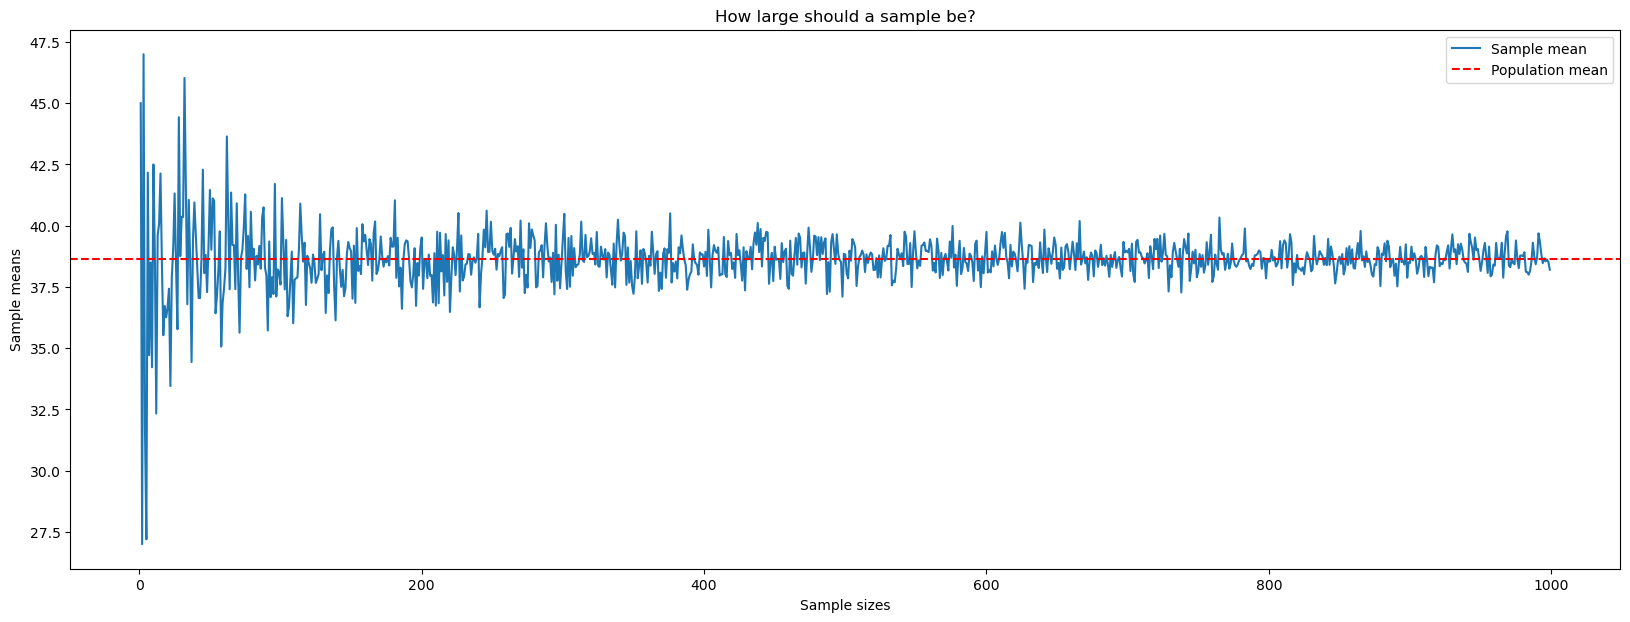

In [16]:
fig, ax = plt.subplots(figsize=(20,7))

sns.lineplot(data=sample_means_df, x='n', y='mean', ax=ax, label='Sample mean')
ax.axhline(pop_df['age'].mean(), ls='--', color='red', label='Population mean')

ax.set_title('How large should a sample be?')
ax.set_xlabel('Sample sizes')
ax.set_ylabel('Sample means')

ax.legend()
plt.show()

The plot above shows the variation/differences/flunctuations in the sample means for different sample sizes alongside the population mean.

In [17]:
#taking another sample
#note that random_state is used to control the randomness of the sampling process

sample_df = pop_df.sample(n=200, random_state=0)

print('Pop mean:', pop_df['age'].mean())
print('Sample mean:', sample_df['age'].mean())

Pop mean: 38.64358543876172
Sample mean: 38.94


## Central Limit Theorem(CLT)

**This is used to describe the behaviour of the sampling distribution of the mean as the sample size gets larger regardless of the shape of the population distribution.**

It does not necessarily apply to other sample statistics  like median or variance. 

**Sampling distribution** is the theoretical set of all possible sample(or estimated x̄) we can get. 

The idea here is that for a (population) distribution, we can take several n observations from it, then calculate the estimated (x̄) for each of these n observations, e.g take 50 samples containing n=100 observations each from the distribution. The set of all (x̄) possible values then becomes the sampling distribution.

According to CLT, the sampling disribution of the sample mean $\bar{X}$:

1. Will be approxiamtely normally distributed regardless of the shape of the original population distribution

$$\begin{equation}
\ \bar{X} \sim N(\mu_\bar{X}, \sigma_\bar{X})
\end{equation}$$

2. Will have a mean that is equal to the population mean

$$\begin{equation}
\ \mu_\bar{X} \approx \mu_{pop}
\end{equation}$$

3. Will have a std that is equal to the population std divided by the square root of the sample size

$$\begin{equation}
\ \sigma_\bar{X} \approx \frac{\sigma_{pop}}{\sqrt{n}}
\end{equation}$$

In [21]:
#create a function to carry out CLT 

def sampling_distribution(data, sample_size, number_of_sample):
    sample_means = []
    for m in range(number_of_sample):
        sample=data.sample(n=sample_size)
        sample_means.append((sample_size, sample.mean()))
        #where the sample.mean() is different for each sample_size observations drawn from the population
        
    sampling_distribution_df = pd.DataFrame(sample_means, columns=['n', 'mean'])
    
    print('*'*20, 'R E P O R T', '*'*20)
    print('Mean check')
    #note that after taking the sampling mean for each sample of n observations, 
    #we are taking the sampling distribution mean, this is what gets printed here
    print('Sampling distribution mean:', sampling_distribution_df['mean'].mean())
    print('Population mean:', data.mean())
    
    print()
    print('Standard deviation check')
    print('Sampling distribution std:', sampling_distribution_df['mean'].std())
    print('Population std/(sample_size)**0.5:', data.std()/np.sqrt(sample_size))
    
    print()
    return sampling_distribution_df

In [22]:
## a function to do the plotting

def sampling_distribution_plot(data):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout = True)
    
    sns.histplot(data, kde=True, ax=axs[0])
    axs[0].set_title('Sampling distribution')
    axs[0].set_xlabel('Mean')
    axs[0].set_ylabel('Density')
    
    stats.probplot(data, dist=stats.norm, plot=axs[1])
    axs[1].grid()
    
    plt.show()

******************** R E P O R T ********************
Mean check
Sampling distribution mean: 38.418
Population mean: 38.64358543876172

Standard deviation check
Sampling distribution std: 1.5270186176290903
Population std/(sample_size)**0.5: 1.9389589096341133



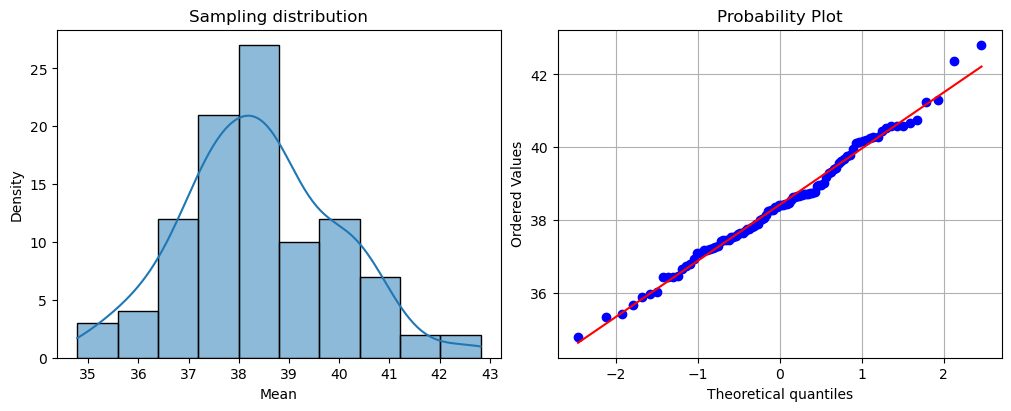

In [23]:
n=50
m = 100

#this means we are drawing 50 samples from the population, each containing 100 observations

sampling_distribution_df = sampling_distribution(
                            data=pop_df['age'],
                            sample_size=n,
                            number_of_sample=m)

sampling_distribution_plot(data=sampling_distribution_df["mean"])

We can see that the plot of the sampling distributions shows that it is approximately equal to a normal distribution.

## Point estimate using m sample (m number of samples drawn from the population)

This point estimate using m sample works based on the principle of Central Limit Theorem (CLT)

**Step 1**: take m different large enough uniform sample of size n

**Step 2**: calculate the sample statistics for each sample: 

$$\bar{x_i} = \frac{\sum{data}}{n}$$

**Step 3**: According to CLT:

a) You will get a sampling distribution for sample mean: 

$$\bar{X} = [\bar{x_1}, \bar{x_2}, \bar{x_3}, ... , \bar{x_m}]$$

b) Calculate the mean of the sampling distribution:

$$\mu_\bar{X} = \frac{\sum{\bar{x_i}}}{m}$$

c) As per CLT, we therefore know that: 

$$\mu_\bar{X} \approx \mu_{POP}$$

**Step 4**: estimate the population parameter using the mean of the sample statistics:

$$\mu_{POP} \approx \mu_\bar{X}$$

******************** R E P O R T ********************
Mean check
Sampling distribution mean: 38.54022
Population mean: 38.64358543876172

Standard deviation check
Sampling distribution std: 1.9280423488344076
Population std/(sample_size)**0.5: 1.9389589096341133



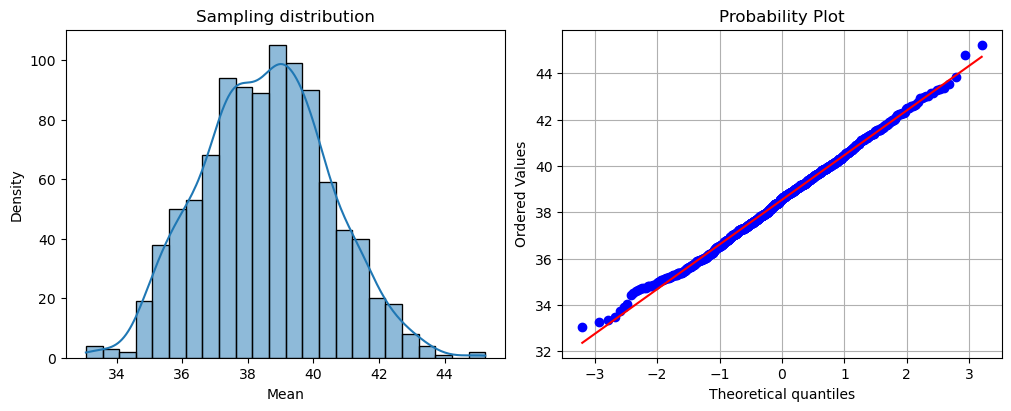

In [24]:
n=50
m=1000

sampling_distribution_df=sampling_distribution(data=pop_df['age'],
                                              sample_size=n,
                                              number_of_sample=m)

sampling_distribution_plot(data=sampling_distribution_df['mean'])

There are some drawbacks of the point estimation. 

- It yields only a single numerical value for the estimation of the corresponding unknown population parameter 
- It does not provide the ability to report the accuracy of the estimate

## Interval estimation

This addresses the drawback of point estimation by providing a random interval for the estimates that contain the true value of the corresponding unknown population parameter and enabling proper reporting of the accuracy of the estimate.

It has the general form of:

`pop parameter = Estimator +/- [Acceptance probability point]*[Standard deviation of the estimator]`

## Confidence Interval estimate using 1 sample (`if population std is known`)

Confidence interval estimation provides a range(interval) of values within which the true population parameter is likely to fall. **It involves calculating a confidence interval around the point estimate.**

For example, a 95% confidence interval might be [160cm, 170cm], indicatng that we are 95% confident that the true population mean height falls within this range.


**Step 1**: take a large enough uniform sample of size n

**Step 2**: calculate the sample statistic: 

$$\bar{x} = \frac{\sum{data}}{n}$$

In order for this step to work, remember that:

- x̄ comes from the sampling distribution, i.e $\bar{X}$

- We need to know the population std, i.e $\sigma_{POP}$

- This is because the sampling distribution std(AKA **Standard error**) is: $\sigma_{\bar{X}} = \frac{\sigma_{POP}}{\sqrt{n}}$

**Step 3**: now set the confidence level and calculate the margin of error as follows:

- Calculate the standard error(SE): $\sigma_{\bar{X}} = \frac{\sigma_{POP}}{\sqrt{n}}$

- Calculate the critical value(AKA Z-score)

- Calculate the margin of error (MOE): $z_{score}*SE$

**Step 4**: estimate the population parameter using sample mean and population standard deviation:

$$\mu_{POP} \approx [\bar{x} \pm (z^*_\frac{\alpha}{2} * \frac{\sigma_{POP}}{\sqrt{n}})] with \ y\% \ confidence$$

The above can also be represented as:

$$\mu_{POP} \approx [\bar{x} \pm {margin \ of \ error}] with \ y\% \ confidence$$


In [25]:
##Step 1: taking a large enough sample

sample_size=200
sample_df=pop_df.sample(n=sample_size, random_state=0)

##Step 2: calculate the sample statsitics(i.e, the mean and std of the sample(s))
pop_std=np.std(pop_df['age'])

sample_mean = np.mean(sample_df['age'])
sample_std = np.std(sample_df['age'], ddof=1)

print('Poulation std:', pop_std)
print('Sample mean:', sample_mean)
print('Sample std:', sample_std)

Poulation std: 13.71036957798689
Sample mean: 38.94
Sample std: 13.512934432791592


#### Explaining ddof=1

By default, `np.std uses ddof=0`, which means that when it divides, it divides it by N (number of items in the population) to calculate the population std.

Whereas `ddof=1` is used to calculate the sample std which adjusts the divisor to n-1 (where n is the number of items in the sample)

In [26]:
##Step 3a: setting the confidence level

confidence_level = 0.95

##Step 3b: calculate standard error(SE)
standard_error = pop_std/np.sqrt(sample_size)
print('Standard error:', standard_error)

##Step 3c: calculate the critical value(z-score)
significance_level = 1-confidence_level
z_score = stats.norm.ppf(1-(significance_level/2))
print('Z-sore:', z_score)

##Step 3d: calculate the margin of error(MOE)
margin_of_error=z_score*standard_error
print('Margin of error:', margin_of_error)

Standard error: 0.9694695301168273
Z-sore: 1.959963984540054
Margin of error: 1.9001253631379509


In [27]:
##Step 4: calculating the confidence interval

lower_bound = sample_mean-margin_of_error
upper_bound = sample_mean+margin_of_error

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

Lower bound: 37.039874636862045
Upper bound: 40.84012536313795


In [28]:
##Print the results

print(f'Sample mean: {sample_mean}')
print(f'Margin of error: {margin_of_error}')
print(f'Confidence interval ({confidence_level*100}%): ({lower_bound}, {upper_bound})')

print()
print(f'Population mean age is estimated to lie in ({lower_bound}, {upper_bound}) range with {confidence_level*100}%')

Sample mean: 38.94
Margin of error: 1.9001253631379509
Confidence interval (95.0%): (37.039874636862045, 40.84012536313795)

Population mean age is estimated to lie in (37.039874636862045, 40.84012536313795) range with 95.0%


In [29]:
pop_df['age'].mean()

38.64358543876172

The population mean age is 38.64. We can see that it falls well within our range.

## Confidence Interval estimate using 1 sample (`if population std is unknown`)

In the real world, we often will not know the true standard deviation of the population, so we make some changes, replacing sigma with S which represents the sample's own standard deviation, and t-score instead of z-score.

**Step 1**: take a uniform sample of size n

**Step 2**: calculate the sample statistic: 

$$\bar{x} = \frac{\sum{data}}{n}$$

In order for this step to work, remember that:

- x̄ comes from the sampling distribution, i.e $\bar{X}$

- In this case, population std is unknown.

**Step 3**: now set the confidence level and calculate the margin of error as follows:

- Calculate the standard error(SE): $\sigma_{\bar{X}} = \frac{S}{\sqrt{n}}$

- Calculate the critical value(AKA t-score)

- Calculate the margin of error (MOE): $t_{score}*SE$

**Step 4**: estimate the population parameter using sample mean and population standard deviation:

$$\mu_{POP} \approx [\bar{x} \pm (t^*_{\frac{\alpha}{2}, n-1} * \frac{S}{\sqrt{n}})] with \ y\% \ confidence$$

In [44]:
##step 1: take a sample
sample_size=200
sample_df = pop_df.sample(n=sample_size, random_state=0)

##step 2: calculating sample statistcs
sample_mean = np.mean(sample_df['age'])
sample_std = np.std(sample_df['age'], ddof=1)

print('Sample mean:', sample_mean)
print('Sample std:', sample_std)

##step 3a: set confidence level
confidence_level=0.95

##step 3b: calculate standard error (SE)
standard_error = sample_std/np.sqrt(sample_size)
print('Standard Error:', standard_error)

##step 3c: calculate the critical value (t-score)
significance_level = 1-confidence_level

t_score = stats.t.ppf(1-(significance_level/2), df=sample_size-1) #remember the bessel's correction
print('t-score:', t_score)

##step 3d: calculate the margin of error(MOE)
margin_of_error = t_score*standard_error
print('MOE:', margin_of_error)

##step 4: calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

Sample mean: 38.94
Sample std: 13.512934432791598
Standard Error: 0.9555087571156131
t-score: 1.971956544249395
MOE: 1.8842217466817388
Lower bound: 37.05577825331826
Upper bound: 40.82422174668174


In [46]:
##Print the results

print(f'Sample mean: {sample_mean}')
print(f'MOE: {margin_of_error}')
print(f'Confidence interval ({confidence_level*100}%): ({lower_bound}, {upper_bound})')

print()
print(f'Population mean age is estimated to lie in ({lower_bound}, {upper_bound}) range with {confidence_level*100}%')

Sample mean: 38.94
MOE: 1.8842217466817388
Confidence interval (95.0%): (37.05577825331826, 40.82422174668174)

Population mean age is estimated to lie in (37.05577825331826, 40.82422174668174) range with 95.0%


**What are other cases of confidence interval estimation?**